# Digit Recognizer by Logistic Regression

`逻辑回归` 训练识别手写数字体

`Accuracy:` 85%

---

Created on 2019-05-21

Update  on 2019-05-23

Author: 家丞

Github: https://github.com/Jiachengciel/Kaggle


---

##  一. 基础环境配置

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

---

## 二. 数据分析

### 2.1 导入数据

In [2]:
# Load the data
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

# classify the data
Y_train = train.label
X_train = train.drop(labels = ['label'], axis=1)

# free some space
del train

print("X size:{}\nTest size: {}". format(X_train.shape, test.shape))

X size:(42000, 784)
Test size: (28000, 784)


### 2.2 数据可视化

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

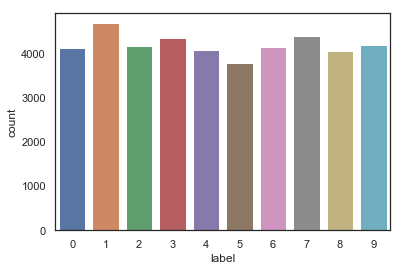

In [3]:
# visualize the data
g = sns.countplot(Y_train)
Y_train.value_counts()

---

## 三. 特征工程

### 3.1 检查缺失值

In [4]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

### 3.2 标准化

In [6]:
X_train = X_train / 255.0
test = test/ 255.0

### 3.3 数组变维度

In [7]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)
Y_train = Y_train.values

### 3.4 分割训练集和交叉训练集

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 
                                                 test_size=0.1,
                                                 random_state=2)

In [9]:
# 将数据集转换为tensor格式
X_Train = torch.from_numpy(X_train)
Y_Train = torch.from_numpy(Y_train).type(torch.LongTensor)

X_Val = torch.from_numpy(X_val)
Y_Val = torch.from_numpy(Y_val).type(torch.LongTensor)

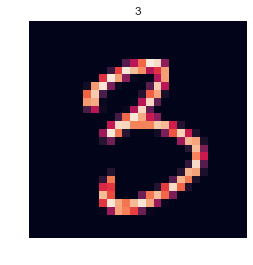

In [10]:
# 可视化数据样本
plt.imshow(X_train[9][:,:,0])
plt.axis('off')
plt.title(str(Y_train[9]))
plt.show()

### 3.5 载入数据备用

In [11]:
batch_size = 100
n_iters = 10000
num_epochs = int(n_iters / (len(X_Train) / batch_size))

train = torch.utils.data.TensorDataset(X_Train, Y_Train)
val = torch.utils.data.TensorDataset(X_Val, Y_Val)

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size, shuffle=False)


---

## 四. 模型选择与使用

### 4.1 定义逻辑回归方法 

In [12]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)

### 4.2 设定前向传播参数

In [13]:
input_dim = 28*28
output_dim = 10 

model = LogisticRegressionModel(input_dim, output_dim)

### 4.3 定义loss function

In [14]:
error = nn.CrossEntropyLoss()

### 4.4 定义训练工具，学习率

In [15]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### 4.5 训练模型

In [16]:
count = 0
loss_list = []
iteration_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train.float())
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Backward propagation
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate accuracy
            correct = 0
            total = 0
            
            # Predict validation dataset
            for images, labels in val_loader:
                val = Variable(images.view(-1, 28*28))
                outputs = model(val.float())
                
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = float(100.00 * correct.item() / float(total))
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            
        if count % 500 == 0:
            print('Iteration: {} Loss: {} Accuracy: {}%'
                  .format(count, loss.data, accuracy))

Iteration: 500 Loss: 1.8189588785171509 Accuracy: 65.64285714285714%
Iteration: 1000 Loss: 1.5449378490447998 Accuracy: 75.76190476190476%
Iteration: 1500 Loss: 1.293643593788147 Accuracy: 78.69047619047619%
Iteration: 2000 Loss: 1.1821662187576294 Accuracy: 80.30952380952381%
Iteration: 2500 Loss: 1.0835140943527222 Accuracy: 81.45238095238095%
Iteration: 3000 Loss: 0.9614933729171753 Accuracy: 81.92857142857143%
Iteration: 3500 Loss: 0.9951607584953308 Accuracy: 82.52380952380952%
Iteration: 4000 Loss: 0.9772806763648987 Accuracy: 82.83333333333333%
Iteration: 4500 Loss: 0.9145395159721375 Accuracy: 83.5%
Iteration: 5000 Loss: 0.900372326374054 Accuracy: 83.78571428571429%
Iteration: 5500 Loss: 0.6423669457435608 Accuracy: 84.0%
Iteration: 6000 Loss: 0.7519010305404663 Accuracy: 84.30952380952381%
Iteration: 6500 Loss: 0.6611079573631287 Accuracy: 84.69047619047619%
Iteration: 7000 Loss: 0.6885690093040466 Accuracy: 85.07142857142857%
Iteration: 7500 Loss: 0.551683783531189 Accuracy:

### 4.6 可视化loss下降过程

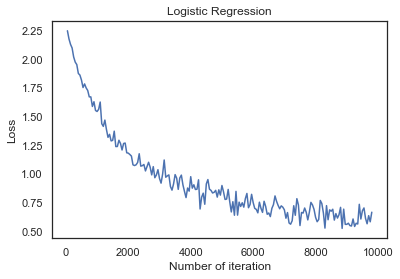

In [17]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression")
plt.show()